In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
directory = '../data/'
output_dir = '../data/csv_grouped_data'

In [9]:
filename_ibex ="../data/grouped_data_day_mean_tweets_sentimentdata-scraper_ibex_2018-2020.csv"
filename_ibex_prices ="../data/ibex_historico.csv"
filename_precios_bolsa = "../data/es_mse_mean_day.csv"
filename_asoc = "../data/grouped_data_day_mean_tweets_sentimentdata-scraper_asociaciones_2016-2020.csv"

df_asoc = pd.read_csv(filename_asoc, sep=";")
df_ibex = pd.read_csv(filename_ibex, sep=";")
df_ibex_prices = pd.read_csv(filename_ibex_prices, sep=",")
df_precios_bolsa = pd.read_csv(filename_precios_bolsa, sep=";")

df_x = pd.merge(left=df_asoc, right=df_ibex, left_on='normalised_date', right_on='normalised_date')
df_total = pd.merge(left=df_x, right=df_ibex_prices, left_on='normalised_date', right_on='Date')
df_total = df_total.rename(columns={"sentiment_x": "sentiment_asociacones", "sentiment_y": "sentiment_ibex"})
df_total["normalised_date"]= pd.to_datetime(df_total["normalised_date"]) 
df_total = df_total[["normalised_date","sentiment_asociacones", "sentiment_ibex", "Close"]]

df_precios_bolsa = df_precios_bolsa[["date", "price_change"]]
df_precios_bolsa["date"]= pd.to_datetime(df_precios_bolsa["date"]) 
df_total = pd.merge(left=df_total, right=df_precios_bolsa, left_on='normalised_date', right_on='date')

df_total.sentiment_asociacones = df_total.sentiment_asociacones
df_total.sentiment_ibex = df_total.sentiment_ibex
df_total.Close = df_total.Close.diff()
df_total = df_total.rename(columns={"Close": "ibex_change", "price_change": "madrid_change"})
df_total['sentiment_asociacones'] = df_total['sentiment_asociacones'].astype(float).diff()
df_total['sentiment_ibex'] = df_total['sentiment_ibex'].astype(float).diff()
df_total['ibex_change'] = df_total['ibex_change'].astype(float)
df_total['madrid_change'] = df_total['madrid_change'].astype(float)

df_total = df_total.dropna()
df_total = df_total[['normalised_date','sentiment_asociacones', 'sentiment_ibex', 'madrid_change']]
df_total.to_csv("df_total_es.csv", sep=";")

df_total_no_covid = df_total.copy()
df_total_no_covid = df_total_no_covid[:-100]
df_total_no_covid



,normalised_date,sentiment_asociacones,sentiment_ibex,madrid_change
1,2017-01-24,0.031742,-0.000420,1.260981
2,2017-01-25,-0.007774,-0.432036,1.614972
3,2017-01-26,-0.038962,0.479446,-0.810021
4,2017-01-27,0.046862,-0.417707,-0.140292
5,2017-01-30,-0.008826,0.478613,-1.385265
...,...,...,...,...
741,2019-12-17,-0.021648,-0.018915,-0.553620
742,2019-12-18,0.049066,0.003646,-0.258039
743,2019-12-19,-0.009887,-0.003893,-0.007002
744,2019-12-20,0.090181,0.017316,0.090962


In [10]:
from statsmodels.tsa.stattools import grangercausalitytests

start_date = "2020-01-10 00:00:00.000"
end_date = "2020-05-01 00:00:00.000"

mask = (df_total['normalised_date'] > start_date) & (df_total['normalised_date'] <= end_date)
df_restricted = df_total.copy()
df_restricted = df_restricted.loc[mask]
print(df_restricted)


granger_test = sm.tsa.stattools.grangercausalitytests(df_restricted[['sentiment_ibex','madrid_change']], maxlag=6, verbose=True)
granger_test

    normalised_date  sentiment_asociacones  sentiment_ibex  madrid_change
757      2020-01-13               0.039317       -0.071115      -0.168955
758      2020-01-14              -0.026994       -0.028977      -0.316230
759      2020-01-15               0.092732        0.029453       0.064996
760      2020-01-16              -0.046320        0.071231       0.421060
761      2020-01-17              -0.050825       -0.063411       0.657701
..              ...                    ...             ...            ...
829      2020-04-24               0.009718       -0.026704      -2.210167
830      2020-04-27              -0.015568       -0.008943       2.154101
831      2020-04-28              -0.085925       -0.008434       1.837390
832      2020-04-29               0.031606        0.003427       3.411931
833      2020-04-30               0.007409        0.032325      -1.076312

[77 rows x 4 columns]

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0640  , p=0.0

{1: ({'ssr_ftest': (3.0640348343961583, 0.0842441277373184, 73.0, 1),
   'ssr_chi2test': (3.1899540741658634, 0.0740920932127361, 1),
   'lrtest': (3.1248242073124857, 0.07710818796272577, 1),
   'params_ftest': (3.064034834396156, 0.0842441277373184, 73.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.067642454456621, 0.05283505893319256, 70.0, 2),
   'ssr_chi2test': (6.573519545264188, 0.037374756115435545, 2),
   'lrtest': (6.3012435292934015, 0.042825491210931065, 2),
   'params_ftest': (3.0676424544566867, 0.05283505893318921, 70.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.6770170642238034, 0.0540500919829061, 67.0, 3),
   'ssr_chi2test': (8.870116242652005, 0.031068546362817206, 3),
   'lrtest': (8.377497403135294, 0.03882142114401453, 3),
   'params_ftest': (2.677017064223669, 0.05405009198291494, 67.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0

In [13]:
from statsmodels.tsa.stattools import grangercausalitytests

start_date = "2020-01-10 00:00:00.000"
end_date = "2020-05-01 00:00:00.000"

mask = (df_total['normalised_date'] > start_date) & (df_total['normalised_date'] <= end_date)
df_restricted = df_total.copy()
df_restricted = df_restricted.loc[mask]
print(df_restricted)


granger_test = sm.tsa.stattools.grangercausalitytests(df_restricted[['sentiment_asociacones','madrid_change']], maxlag=11, verbose=True)
granger_test

normalised_date  sentiment_asociacones  sentiment_ibex  madrid_change
757      2020-01-13               0.039317       -0.071115      -0.168955
758      2020-01-14              -0.026994       -0.028977      -0.316230
759      2020-01-15               0.092732        0.029453       0.064996
760      2020-01-16              -0.046320        0.071231       0.421060
761      2020-01-17              -0.050825       -0.063411       0.657701
..              ...                    ...             ...            ...
829      2020-04-24               0.009718       -0.026704      -2.210167
830      2020-04-27              -0.015568       -0.008943       2.154101
831      2020-04-28              -0.085925       -0.008434       1.837390
832      2020-04-29               0.031606        0.003427       3.411931
833      2020-04-30               0.007409        0.032325      -1.076312

[77 rows x 4 columns]

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6513  , p=0.4223 

{1: ({'ssr_ftest': (0.651276482641632, 0.42227828331544925, 73.0, 1),
   'ssr_chi2test': (0.6780412695995073, 0.41026202290449065, 1),
   'lrtest': (0.6750345345944879, 0.4113018263314403, 1),
   'params_ftest': (0.6512764826416458, 0.42227828331544637, 73.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.222928993328045, 0.8007375554402034, 70.0, 2),
   'ssr_chi2test': (0.47770498570295356, 0.7875310402635405, 2),
   'lrtest': (0.4761900680219924, 0.7881277885897569, 2),
   'params_ftest': (0.2229289933280365, 0.8007375554402096, 70.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.5600412359248443, 0.6432470591087975, 67.0, 3),
   'ssr_chi2test': (1.8556590205270957, 0.602898446963213, 3),
   'lrtest': (1.832774121378577, 0.607829022218644, 3),
   'params_ftest': (0.5600412359248671, 0.643247059108782, 67.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 

In [14]:

start_date = "2020-01-01 00:00:00.000"
end_date = "2020-06-01 00:00:00.000"

mask = (df_total['normalised_date'] > start_date) & (df_total['normalised_date'] <= end_date)
df_restricted = df_total.copy()
df_restricted = df_restricted.loc[mask]

from statsmodels.tsa.stattools import grangercausalitytests
granger_test = sm.tsa.stattools.grangercausalitytests(df_restricted[['sentiment_ibex','madrid_change']], maxlag=11, verbose=True)
print(granger_test)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2475  , p=0.1373  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=2.3208  , p=0.1277  , df=1
likelihood ratio test: chi2=2.2929  , p=0.1300  , df=1
parameter F test:         F=2.2475  , p=0.1373  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5738  , p=0.0819  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=5.4368  , p=0.0660  , df=2
likelihood ratio test: chi2=5.2853  , p=0.0712  , df=2
parameter F test:         F=2.5738  , p=0.0819  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0460  , p=0.1134  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=6.6377  , p=0.0844  , df=3
likelihood ratio test: chi2=6.4115  , p=0.0932  , df=3
parameter F test:         F=2.0460  , p=0.1134  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7287  , p=0.1514  , df_d

In [26]:
from statsmodels.tsa.stattools import grangercausalitytests
granger_test = sm.tsa.stattools.grangercausalitytests(df_total_no_covid[['sentiment_ibex','madrid_change']], maxlag=1, verbose=True)
print(granger_test)

from statsmodels.tsa.stattools import grangercausalitytests
granger_test = sm.tsa.stattools.grangercausalitytests(df_total_no_covid[['sentiment_asociacones','madrid_change']], maxlag=1, verbose=True)
print(granger_test)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8235  , p=0.3645  , df_denom=741, df_num=1
ssr based chi2 test:   chi2=0.8268  , p=0.3632  , df=1
likelihood ratio test: chi2=0.8263  , p=0.3633  , df=1
parameter F test:         F=0.8235  , p=0.3645  , df_denom=741, df_num=1
{1: ({'ssr_ftest': (0.8234658020471067, 0.36446379868403833, 741.0, 1), 'ssr_chi2test': (0.8267996716910221, 0.3631995727301932, 1), 'lrtest': (0.8263406047099124, 0.36333282016267165, 1), 'params_ftest': (0.8234658020471194, 0.36446379868401424, 741.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x131a78090>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x131a78950>, array([[0., 1., 0.]])])}

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6581  , p=0.4175  , df_denom=741, df_num=1
ssr based chi2 test:   chi2=0.6608  , p=0.4163  , df=1
likelihood ratio test: chi2=0.6605  , p=0.4164  , df=1
parameter 

In [42]:
# https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
# Fit the model
model = VAR(df_total_no_covid[['sentiment_asociacones', 'sentiment_ibex', 'madrid_change']])
results = model.fit(maxlags=15, ic='aic')

# https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
# Fit the model
model_restricted = VAR(df_restricted[['sentiment_asociacones', 'sentiment_ibex', 'madrid_change']])
results_restricted = model.fit(maxlags=15, ic='aic')
results.summary()

/Users/hugojosebello/.local/share/virtualenvs/twitter-data-scripts-analysis-AIss9UM-/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/hugojosebello/.local/share/virtualenvs/twitter-data-scripts-analysis-AIss9UM-/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 29, Jun, 2020
Time:                     19:54:27
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -11.4922
Nobs:                     733.000    HQIC:                  -11.9199
Log likelihood:           1457.80    FPE:                5.09048e-06
AIC:                     -12.1884    Det(Omega_mle):     4.39135e-06
--------------------------------------------------------------------
Results for equation sentiment_asociacones
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------
const                            -0.000477         0.001829           -0.261           0.794
L1.sentiment_asociacones         -0.809772         0.037742          -21.455           0.

In [19]:
# https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
# Fit the model
model_no_covid = VAR(df_total_no_covid[['sentiment_asociacones', 'sentiment_ibex', 'madrid_change']])
results_no_covid = model_no_covid.fit(maxlags=15, ic='aic')
results_no_covid.summary()

/Users/hugojosebello/.local/share/virtualenvs/twitter-data-scripts-analysis-AIss9UM-/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 29, Jun, 2020
Time:                     14:47:35
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -11.4922
Nobs:                     733.000    HQIC:                  -11.9199
Log likelihood:           1457.80    FPE:                5.09048e-06
AIC:                     -12.1884    Det(Omega_mle):     4.39135e-06
--------------------------------------------------------------------
Results for equation sentiment_asociacones
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------
const                            -0.000477         0.001829           -0.261           0.794
L1.sentiment_asociacones         -0.809772         0.037742          -21.455           0.

In [28]:

# convert to (records, timesteps, indicators)
def create_window_data_arrays(arrays,window_size):
    data = np.column_stack((arrays))
    arr_len = len(arrays[0])
    windows = np.array([data[i-window_size: i] for i in range(window_size +1,arr_len+1)])
    return windows


def create_window_data_array_with_shift(array,window_size, shift):
    return np.array([array[i-window_size: i] for i in range(shift +1,len(array)+1)])

In [30]:
lag_order = results.k_ar
print(df_total_no_covid)
train_x = create_window_data_arrays((df_total_no_covid.sentiment_asociacones,df_total_no_covid.sentiment_ibex, df_total_no_covid.madrid_change), lag_order)
print(train_x.shape)
print(train_x[-1])
print("----")

print(df_total_no_covid.values[-1])
print("----")
print(results.forecast(train_x[-1], 1))


normalised_date  sentiment_asociacones  sentiment_ibex  madrid_change
1        2017-01-24               0.031742       -0.000420       1.260981
2        2017-01-25              -0.007774       -0.432036       1.614972
3        2017-01-26              -0.038962        0.479446      -0.810021
4        2017-01-27               0.046862       -0.417707      -0.140292
5        2017-01-30              -0.008826        0.478613      -1.385265
..              ...                    ...             ...            ...
741      2019-12-17              -0.021648       -0.018915      -0.553620
742      2019-12-18               0.049066        0.003646      -0.258039
743      2019-12-19              -0.009887       -0.003893      -0.007002
744      2019-12-20               0.090181        0.017316       0.090962
745      2019-12-23              -0.141086       -0.097664      -0.024881

[745 rows x 4 columns]
(733, 12, 3)
[[-0.17221185 -0.06674422  0.94519472]
 [ 0.0576292   0.10065798 -0.28856559]
 

In [43]:
lag_order_restricted = results_restricted.k_ar
train_x_restricted = create_window_data_arrays((df_restricted.sentiment_asociacones,df_restricted.sentiment_ibex, df_restricted.madrid_change), lag_order_restricted)


[0.03549908 0.09244314 0.19908504]
(845, 4)
(733, 3)
0.6931281665508155
[[ 0.75498299 -0.11962496]
 [-0.92035478 -0.14128663]
 [ 0.73546661 -0.20691264]
 ...
 [-0.00700218 -0.00818597]
 [ 0.09096151 -0.34379612]
 [-0.02488097  0.19908504]]


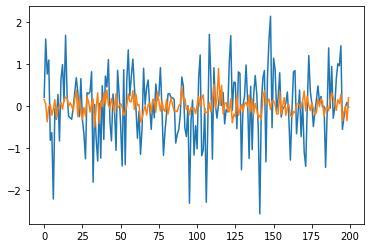

In [32]:
results.forecast(train_x[0], 1)
forecasted = np.array([list(results.forecast(train_x[i], 1)[0]) for i in range(0,train_x.shape[0])])
print(forecasted[-1])

print(df_total.values.shape)
print(forecasted.shape)

# while using one ts
#y_pred = forecasted[:,1:]
y_pred = forecasted[:,2:]
y_train = df_total_no_covid.madrid_change.values[lag_order:]

M = np.column_stack((y_train, y_pred))

from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(forecasted, y_pred))


print(M)
plt.plot(M[-200:])

2.1140108394304855
[[ 7.05166169e-01  1.15829624e-01]
 [-4.10166231e-01 -4.73432229e-01]
 [-8.08110386e-01  1.19734982e-01]
 [ 5.95197204e-02 -1.16290939e-01]
 [ 1.48627918e+00  1.28901702e-01]
 [ 1.25871035e+00  1.57167604e-01]
 [ 7.09637528e-01 -3.53266038e-02]
 [-2.82369691e-01  2.58211834e-01]
 [-2.54538360e-01 -9.44806851e-02]
 [ 8.15879301e-01  1.38632405e-02]
 [ 2.96623211e-01  1.25609264e-01]
 [-6.25158156e-01  4.77662319e-02]
 [ 4.31930352e-01 -2.89244744e-01]
 [ 5.61006814e-01 -1.59916070e-01]
 [-4.60511321e-01 -1.48979264e-02]
 [ 5.29224940e-01 -2.15249452e-01]
 [-1.40946844e+00 -1.47823451e-02]
 [ 7.65537464e-02  1.48536502e-01]
 [-3.80935434e+00 -2.71461295e-01]
 [-2.36540483e+00 -9.06410260e-02]
 [ 7.24566361e-01  1.08842328e-01]
 [-2.54202641e+00 -2.68161259e-01]
 [-2.66719508e+00  3.06573508e-02]
 [ 1.73225632e+00  1.83006338e-01]
 [ 4.97520608e-01 -9.02655394e-02]
 [ 7.79982520e-01  2.87829615e-01]
 [-1.82573393e+00  2.59823705e-01]
 [-2.61105785e+00  1.81179639e-01]
 

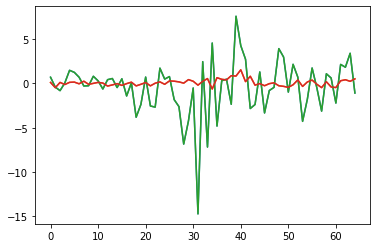

In [44]:
results_restricted.forecast(train_x[0], 1)
forecasted = np.array([list(results_restricted.forecast(train_x_restricted[i], 1)[0]) for i in range(0,train_x_restricted.shape[0])])

y_pred = forecasted[:,2:]
y_train = df_restricted.madrid_change.values[lag_order_restricted:]

M = np.column_stack((y_train, y_pred))

from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_train, y_pred))


print(M)
plt.plot(M[-200:])
print(M)
plt.plot(M[-200:])

In [11]:
# Split data
nobs = 4
df_train, df_test = df_total[0:-nobs], df_total[-nobs:]
# Check for stationarity with Augmented Dickey-Fuller Test (ADF Test)
# Augmented Dickey-Fuller Test (ADF Test)/unit root test
from statsmodels.tsa.stattools import adfuller

def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")

#apply adf test on the series
adf_test(df_train["sentiment_asociacones"])
adf_test(df_train["sentiment_ibex"])
adf_test(df_train["madrid_change"])

Test Statistic         -1.245297e+01
p-value                 3.541674e-23
# Lags                  2.000000e+01
# Observations          7.190000e+02
Critical Value (1%)    -3.439478e+00
Critical Value (5%)    -2.865568e+00
Critical Value (10%)   -2.568915e+00
dtype: float64
 Series is Stationary
Test Statistic         -1.404283e+01
p-value                 3.280194e-26
# Lags                  1.900000e+01
# Observations          7.200000e+02
Critical Value (1%)    -3.439465e+00
Critical Value (5%)    -2.865563e+00
Critical Value (10%)   -2.568912e+00
dtype: float64
 Series is Stationary
Test Statistic          -26.412281
p-value                   0.000000
# Lags                    0.000000
# Observations          739.000000
Critical Value (1%)      -3.439230
Critical Value (5%)      -2.865459
Critical Value (10%)     -2.568857
dtype: float64
 Series is Stationary
